In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
dataset = pd.read_csv(r"C:\Users\Supriya\Downloads\car_sales_dataset_in_lakhs.csv")
dataset

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,Chevrolet Malibu,2019,7609.050,6957.675,21661,Petrol,Individual,Automatic,1
1,Toyota Corolla,2001,10800.375,11324.100,129845,Diesel,Dealer,Manual,3
2,Hyundai Elantra,2019,10272.825,6458.625,122512,Petrol,Individual,Manual,1
3,Mercedes-Benz C-Class,2002,7763.850,14342.325,99906,Diesel,Individual,Manual,2
4,Mercedes-Benz C-Class,2013,8723.475,12762.825,139542,Diesel,Dealer,Manual,2
...,...,...,...,...,...,...,...,...,...
295,Mazda CX-5,2004,3071.175,6885.225,171539,Diesel,Dealer,Automatic,0
296,Chevrolet Malibu,2014,5381.625,5090.925,168714,Petrol,Individual,Automatic,2
297,Chevrolet Tahoe,2021,5249.775,3628.800,89727,Electric,Individual,Manual,3
298,Mercedes-Benz C-Class,2016,8281.200,11900.625,169421,Electric,Dealer,Manual,0


In [3]:
dataset.isnull().sum()
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       300 non-null    object 
 1   Year           300 non-null    int64  
 2   Selling_Price  300 non-null    float64
 3   Present_Price  300 non-null    float64
 4   Driven_kms     300 non-null    int64  
 5   Fuel_Type      300 non-null    object 
 6   Selling_type   300 non-null    object 
 7   Transmission   300 non-null    object 
 8   Owner          300 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.2+ KB


Range of years: 2000 to 2023


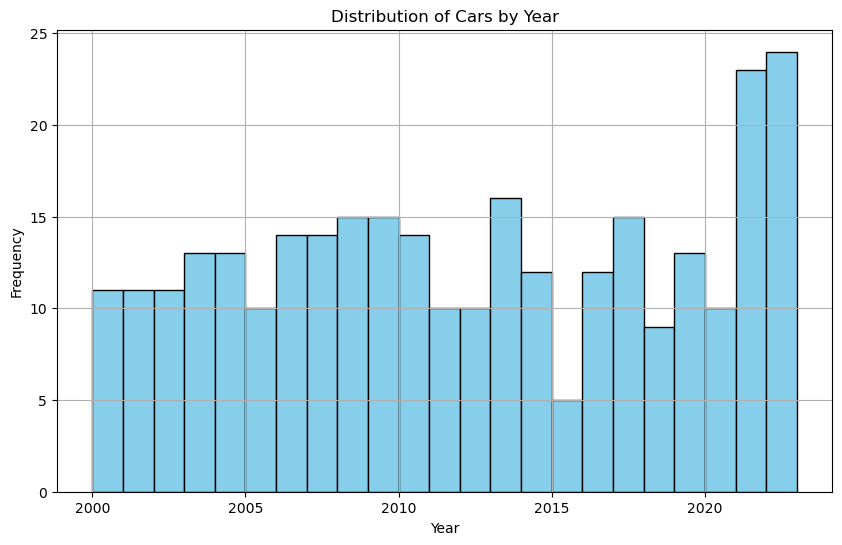

In [4]:
min_year = dataset['Year'].min()
max_year = dataset['Year'].max()
print(f"Range of years: {min_year} to {max_year}")
plt.figure(figsize=(10, 6))
plt.hist(dataset['Year'], bins=range(dataset['Year'].min(), dataset['Year'].max() + 1), color='skyblue', edgecolor='black')
plt.title('Distribution of Cars by Year')
plt.xlabel('Year')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

Maximum selling price: 11249.175000000005
Minimum selling price: 2274.0750000000003
Car with Maximum Selling Price of  Mazda CX-5  is in 11249.175000000005
Car with Minimum Selling Priceof  Hyundai Elantra  is in 2274.0750000000003


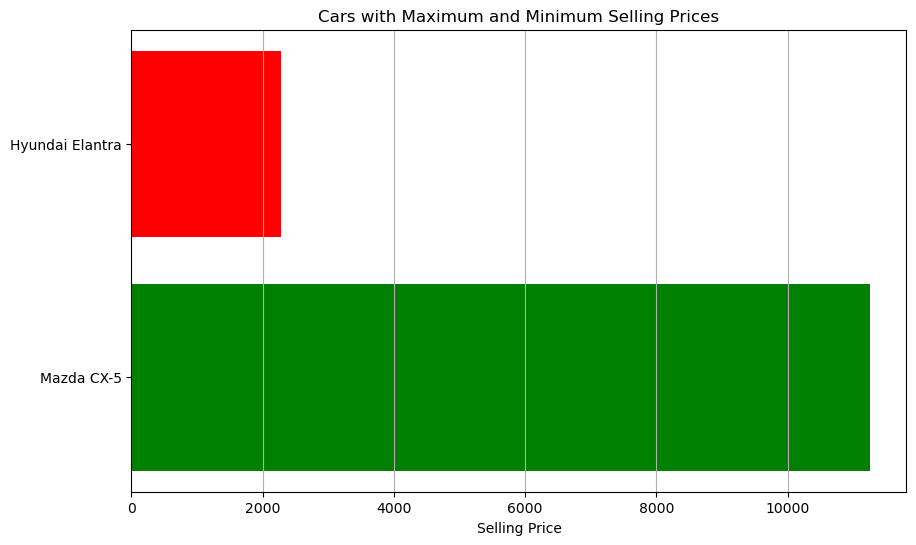

In [5]:
max_selling_car = dataset.loc[dataset['Selling_Price'].idxmax(), 'Car_Name']
min_selling_car = dataset.loc[dataset['Selling_Price'].idxmin(), 'Car_Name']
max_selling_price = dataset['Selling_Price'].max()
min_selling_price = dataset['Selling_Price'].min()
print("Maximum selling price:", max_selling_price)
print("Minimum selling price:", min_selling_price)
print("Car with Maximum Selling Price of ", max_selling_car," is in",max_selling_price)
print("Car with Minimum Selling Priceof ", min_selling_car," is in",min_selling_price)

# Plotting
plt.figure(figsize=(10, 6))
plt.barh([max_selling_car, min_selling_car], [dataset['Selling_Price'].max(), dataset['Selling_Price'].min()], color=['green', 'red'])
plt.xlabel('Selling Price')
plt.title('Cars with Maximum and Minimum Selling Prices')
plt.grid(axis='x')
plt.show()

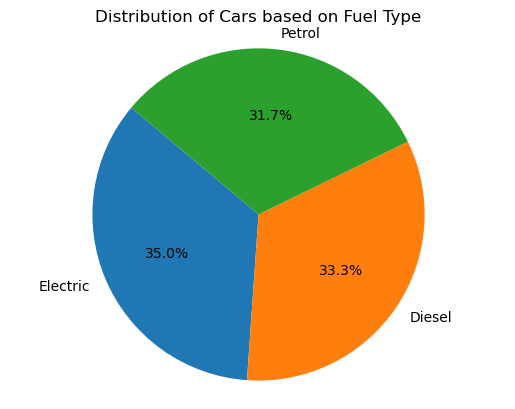

In [6]:
fuel_type_counts = dataset['Fuel_Type'].value_counts()

# Plotting
plt.pie(fuel_type_counts, labels=fuel_type_counts.index, autopct='%1.1f%%', startangle=140)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Distribution of Cars based on Fuel Type')
plt.show()

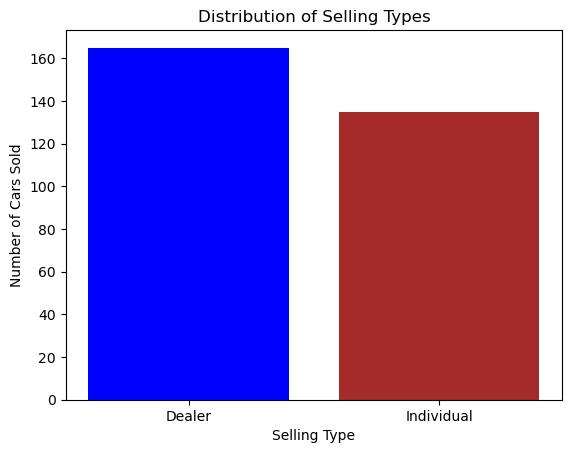

In [7]:
selling_type_counts = dataset['Selling_type'].value_counts()

# Plot the counts
plt.bar(selling_type_counts.index, selling_type_counts.values, color=['blue', 'brown'])
plt.title('Distribution of Selling Types')
plt.xlabel('Selling Type')
plt.ylabel('Number of Cars Sold')
plt.show()

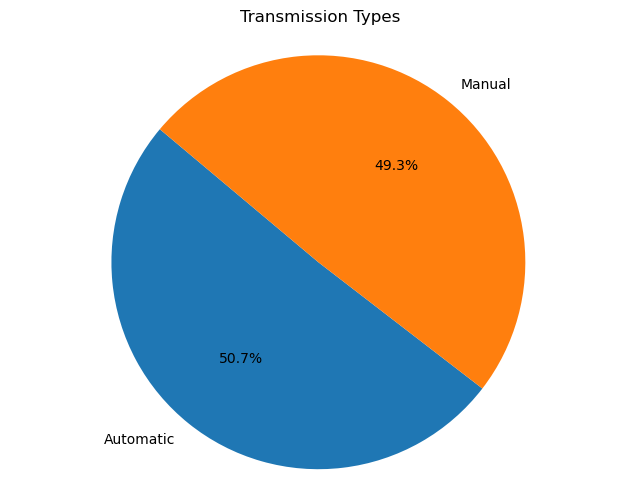

In [8]:
transmission_counts = dataset['Transmission'].value_counts()

# Plotting the transmission types as a pie chart
plt.figure(figsize=(8, 6))
plt.pie(transmission_counts, labels=transmission_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Transmission Types')
plt.axis('equal')
plt.show()

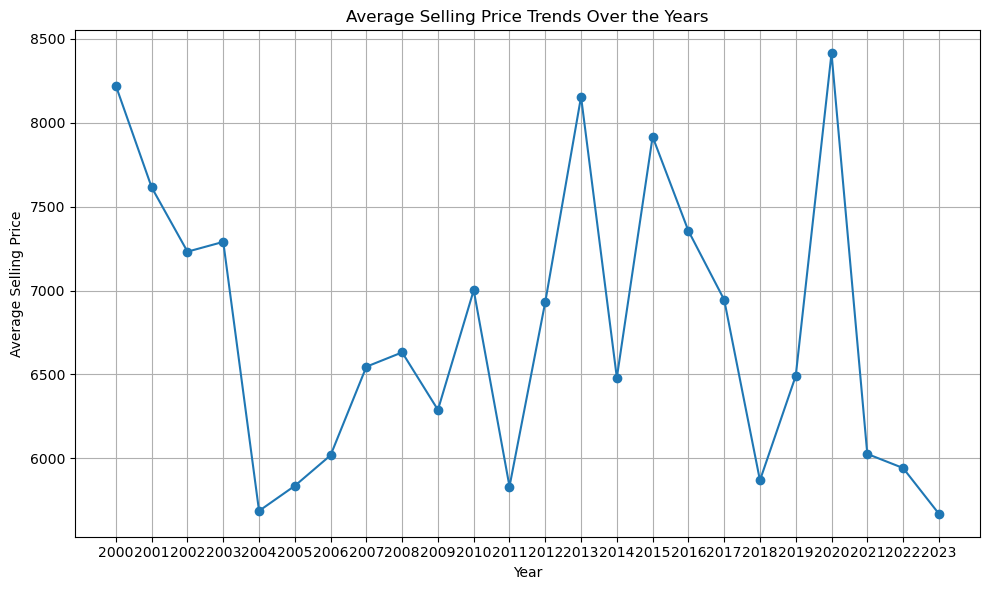

In [9]:
price_trends = dataset.groupby('Year')['Selling_Price'].mean().reset_index()

# Sorting the DataFrame by year
price_trends = price_trends.sort_values(by='Year')

# Plotting the price trends
plt.figure(figsize=(10, 6))
plt.plot(price_trends['Year'], price_trends['Selling_Price'], marker='o', linestyle='-')
plt.title('Average Selling Price Trends Over the Years')
plt.xlabel('Year')
plt.ylabel('Average Selling Price')
plt.grid(True)
plt.xticks(price_trends['Year'])
plt.tight_layout()
plt.show()

Correlation between Selling Price and owner: -0.07637452430956672


<Figure size 1000x600 with 0 Axes>

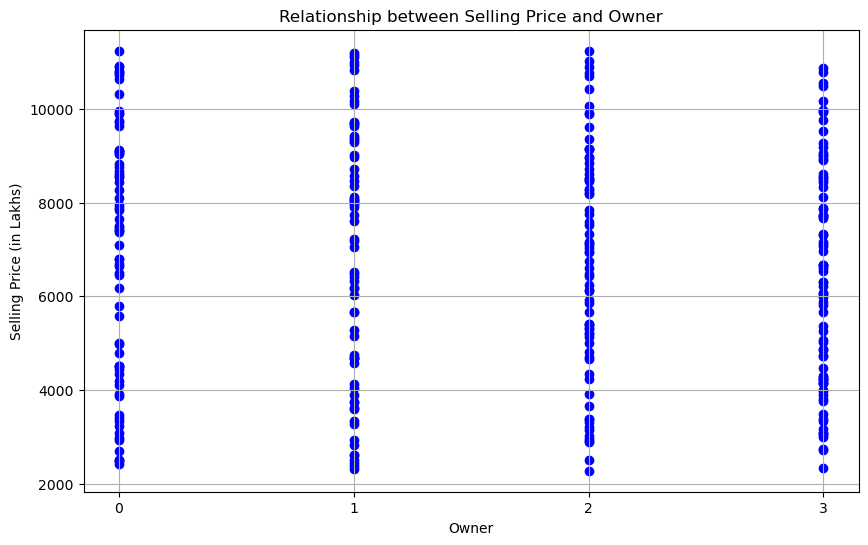

In [10]:
correlation = dataset['Selling_Price'].corr(dataset['Owner'])

print("Correlation between Selling Price and owner:", correlation)
plt.figure(figsize=(10, 6))
plt.figure(figsize=(10, 6))
plt.scatter(dataset['Owner'], dataset['Selling_Price'], color='blue')
plt.title('Relationship between Selling Price and Owner')
plt.xlabel('Owner')
plt.ylabel('Selling Price (in Lakhs)')
plt.xticks(range(max(dataset['Owner']) + 1))
plt.grid(True)
plt.show()

Correlation between Selling Price and Driven Kilometers: 0.00979724736453136


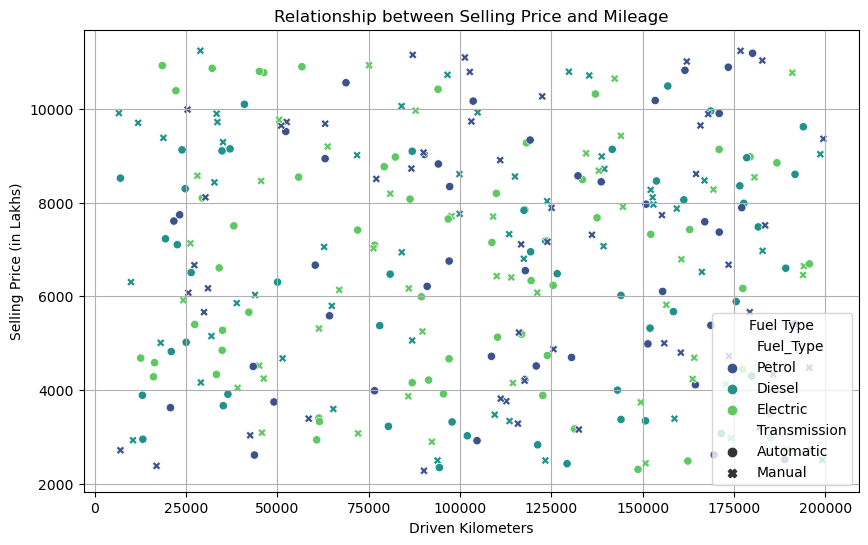

In [11]:
correlation = dataset['Selling_Price'].corr(dataset['Driven_kms'])

print("Correlation between Selling Price and Driven Kilometers:", correlation)

plt.figure(figsize=(10, 6))
sns.scatterplot(x="Driven_kms", y="Selling_Price", data=dataset, hue="Fuel_Type", style="Transmission", palette="viridis")
plt.title("Relationship between Selling Price and Mileage")
plt.xlabel("Driven Kilometers")
plt.ylabel("Selling Price (in Lakhs)")
plt.legend(title="Fuel Type")
plt.grid(True)
plt.show()

Correlation between Selling Price and years: -0.07334217332556356


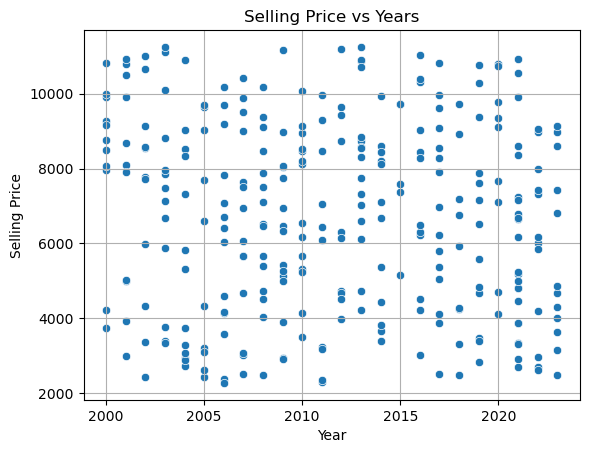

In [12]:
correlation = dataset['Selling_Price'].corr(dataset['Year'])

print("Correlation between Selling Price and years:", correlation)
sns.scatterplot(x="Year", y="Selling_Price", data=dataset, palette="viridis")
plt.title('Selling Price vs Years')
plt.xlabel('Year')
plt.ylabel('Selling Price')
plt.grid(True)
plt.show()

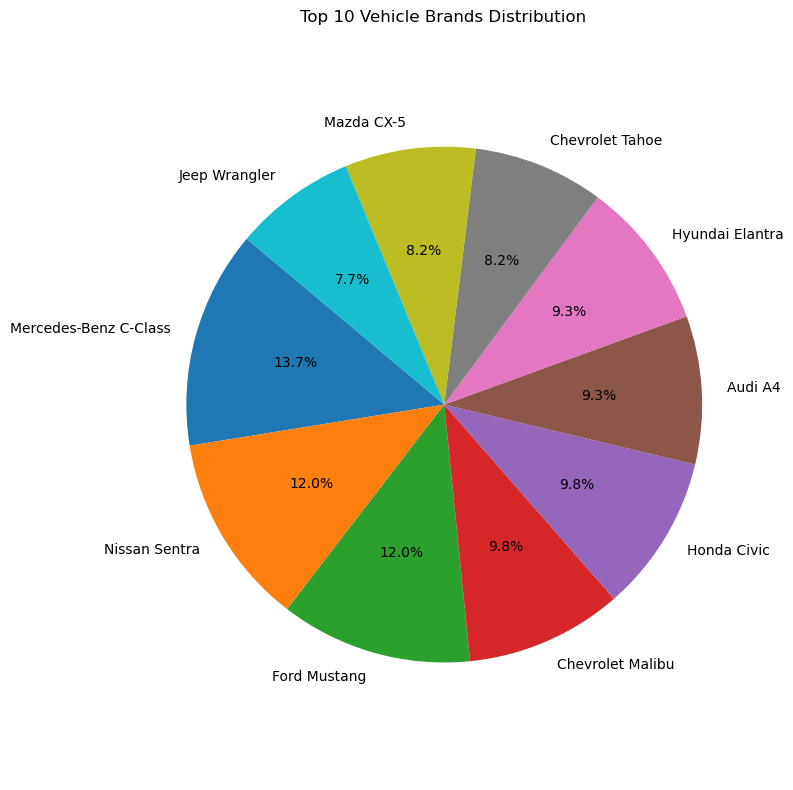

In [13]:
brand_distribution = dataset['Car_Name'].value_counts()

top_10_brands = brand_distribution.head(10)

# Plotting the pie chart
plt.figure(figsize=(8, 8))
plt.pie(top_10_brands, labels=top_10_brands.index, autopct='%1.1f%%', startangle=140)
plt.title('Top 10 Vehicle Brands Distribution')
plt.axis('equal')  
plt.tight_layout()
plt.show()

In [14]:
from sklearn.preprocessing import LabelEncoder
Car_Name_le = LabelEncoder()
dataset['Car_Name'] = Car_Name_le.fit_transform(dataset['Car_Name'])
Fuel_Type_le = LabelEncoder()
dataset['Fuel_Type'] = Fuel_Type_le.fit_transform(dataset['Fuel_Type'])
Selling_type_le = LabelEncoder()
dataset['Selling_type'] = Selling_type_le.fit_transform(dataset['Selling_type'])
Transmission_le = LabelEncoder()
dataset['Transmission'] = Transmission_le.fit_transform(dataset['Transmission'])

##Split the data into X AND Y
input_data = dataset[["Car_Name","Year","Present_Price", "Driven_kms","Fuel_Type", "Selling_type", "Transmission", "Owner" ]]
output_data = dataset["Selling_Price"]

In [15]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
input_data  = pd.DataFrame(ss.fit_transform(input_data),columns = input_data.columns)

input_data.head(2)

,Car_Name,Year,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,-1.268472,1.051338,-0.698816,-1.506755,1.261289,1.105542,-0.986754,-0.502813
1,1.586037,-1.542186,0.576950,0.450093,-1.219936,-0.904534,1.013423,1.261443


In [16]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(input_data, output_data , test_size = 0.2, random_state = 42)
print("Training set shape:", x_train.shape, y_train.shape)
print("Testing set shape:", x_test.shape, y_test.shape)

Training set shape: (240, 8) (240,)
Testing set shape: (60, 8) (60,)


In [23]:

from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(x_train, y_train)
y_train_pred = lr.predict(x_train)
y_test_pred = lr.predict(x_test)
train_rmse_lr = sklearn.metrics.mean_squared_error(y_train, y_train_pred, squared=False)
test_rmse_lr = sklearn.metrics.mean_squared_error(y_test, y_test_pred, squared=False)
print(f"Train RMSE: {train_rmse_lr}")
print(f"Test RMSE: {test_rmse_lr}\n")
print("R squared for train is :",lr.score(x_train,y_train)*100)
print("R squared for test is :", lr.score(x_test,y_test)*100)

Train RMSE: 2506.290952504679
Test RMSE: 2469.8866570512114

R squared for train is : 5.690775829159211
R squared for test is : -10.983758669845244


In [25]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(random_state=42)
rf.fit(x_train, y_train)
y_train_pred = rf.predict(x_train)
y_test_pred = rf.predict(x_test)
train_rmse_rf = sklearn.metrics.mean_squared_error(y_train, y_train_pred, squared=False)
test_rmse_rf = sklearn.metrics.mean_squared_error(y_test, y_test_pred, squared=False)
print(f"Train RMSE: {train_rmse_rf}")
print(f"Test RMSE: {test_rmse_rf}\n")
print("R squared for train is :",rf.score(x_train,y_train)*100)
print("R squared for test is :", rf.score(x_test,y_test)*100)

Train RMSE: 1001.4756730943584
Test RMSE: 2632.5368060341816

R squared for train is : 84.94183651052232
R squared for test is : -26.08234704593584


In [26]:
from sklearn.tree import DecisionTreeRegressor
dt = DecisionTreeRegressor(random_state=42)
dt.fit(x_train, y_train)
y_train_pred = dt.predict(x_train)
y_test_pred = dt.predict(x_test)
train_rmse_dt = sklearn.metrics.mean_squared_error(y_train, y_train_pred, squared=False)
test_rmse_dt = sklearn.metrics.mean_squared_error(y_test, y_test_pred, squared=False)
print(f"Train RMSE: {train_rmse_dt}")
print(f"Test RMSE: {test_rmse_dt}\n")
print("R squared for train is :",dt.score(x_train,y_train)*100)
print("R squared for test is :", dt.score(x_test,y_test)*100)

Train RMSE: 0.0
Test RMSE: 3515.6655011933726

R squared for train is : 100.0
R squared for test is : -124.86428153799855


In [27]:
from sklearn.svm import SVR
svr = SVR()
svr.fit(x_train, y_train)
y_train_pred = svr.predict(x_train)
y_test_pred = svr.predict(x_test)
train_rmse_svr = sklearn.metrics.mean_squared_error(y_train, y_train_pred, squared=False)
test_rmse_svr = sklearn.metrics.mean_squared_error(y_test, y_test_pred, squared=False)
print(f"Train RMSE: {train_rmse_svr}")
print(f"Test RMSE: {test_rmse_svr}\n")
print("R squared for train is :",svr.score(x_train,y_train)*100)
print("R squared for test is :", svr.score(x_test,y_test)*100)

Train RMSE: 2580.1312593163348
Test RMSE: 2349.5723640502038

R squared for train is : 0.05184069136396907
R squared for test is : -0.4345253883423661


In [28]:
models_performance = {
    "Decision Tree": (test_rmse_dt, dt.score(x_test,y_test)*100),
    "Random Forest": (test_rmse_rf, rf.score(x_test,y_test)*100),
    "Linear Regression": (test_rmse_lr, lr.score(x_test,y_test)*100),
    "Support Vector Regressor": (test_rmse_svr, svr.score(x_test,y_test)*100)
}

sorted_models = sorted(models_performance.items(), key=lambda x: (x[1][0], x[1][1]), reverse=False)

print("Models sorted by RMSE and R squared (Test Set):")
for model, (rmse, r2) in sorted_models:
    print(f"{model}: RMSE = {rmse}, R squared = {r2}")

best_model_name, (best_rmse, best_r2) = sorted_models[0]
print(f"\nBest Model: {best_model_name}")
print(f"RMSE: {best_rmse}")
print(f"R squared: {best_r2}")

Models sorted by RMSE and R squared (Test Set):
Support Vector Regressor: RMSE = 2349.5723640502038, R squared = -0.4345253883423661
Linear Regression: RMSE = 2469.8866570512114, R squared = -10.983758669845244
Random Forest: RMSE = 2632.5368060341816, R squared = -26.08234704593584
Decision Tree: RMSE = 3515.6655011933726, R squared = -124.86428153799855

Best Model: Support Vector Regressor
RMSE: 2349.5723640502038
R squared: -0.4345253883423661


In [30]:
new_data = {
    "Car_Name": "Mercedes-Benz C-Class",
    "Year": 2014,
    "Present_Price": 5.59,
    "Driven_kms": 27000,
    "Fuel_Type": "Petrol",
    "Selling_type": "Dealer",
    "Transmission": "Manual",
    "Owner": 0
}
new_data["Car_Name"] = Car_Name_le.transform([new_data["Car_Name"]])[0]
new_data["Fuel_Type"] = Fuel_Type_le.transform([new_data["Fuel_Type"]])[0]
new_data["Selling_type"] = Selling_type_le.transform([new_data["Selling_type"]])[0]
new_data["Transmission"] = Transmission_le.transform([new_data["Transmission"]])[0]
new_data_df = pd.DataFrame([new_data])

new_data_standardized = pd.DataFrame(ss.transform(new_data_df), columns=new_data_df.columns)

# Make predictions on the standardized new data using the trained Random Forest model
predicted_price = rf.predict(new_data_standardized)

# Print the predicted price
print("Predicted Selling Price:", predicted_price)

Predicted Selling Price: [7997.235]


In [ ]:
car_name = input("Enter car name: ")
year = int(input("Enter year: "))
present_price = float(input("Enter present price: "))
driven_kms = float(input("Enter driven kilometers: "))
fuel_type = input("Enter fuel type (Petrol/Diesel/CNG): ")
selling_type = input("Enter selling type (Dealer/Individual): ")
transmission = input("Enter transmission type (Manual/Automatic): ")
owner = int(input("Enter number of previous owners: "))

# Encode categorical features
car_name_encoded = Car_Name_le.transform([car_name])[0]
fuel_type_encoded = Fuel_Type_le.transform([fuel_type])[0]
selling_type_encoded = Selling_type_le.transform([selling_type])[0]
transmission_encoded = Transmission_le.transform([transmission])[0]

# Create new data point
new_data_point = [[car_name_encoded, year, present_price, driven_kms, fuel_type_encoded, selling_type_encoded, transmission_encoded, owner]]

# Standardize the new data point
new_data_point_standardized = ss.transform(new_data_point)

# Make prediction
prediction = rf.predict(new_data_point_standardized)

print("Predicted Selling Price:", prediction)